# Tratando dados

In [41]:
import pandas as pd
import numpy as np

In [145]:
saureus_features = pd.read_csv('saureus_genome_features.csv')

In [147]:
saureus_ppi = pd.read_csv('saureus_ppi_patric.csv')

In [148]:
saureus_ppi = saureus_ppi[['Interactor A ID', 'Interactor B ID']].astype("string")

In [149]:
saureus_ppi.head()

,Interactor A ID,Interactor B ID
0,fig|93061.5.peg.452,fig|93061.5.peg.713
1,fig|93061.5.peg.1920,fig|93061.5.peg.1921
2,fig|93061.5.peg.111,fig|93061.5.peg.119
3,fig|93061.5.peg.112,fig|93061.5.peg.121
4,fig|93061.5.peg.1069,fig|93061.5.peg.1071


In [150]:
plf = saureus_features[['BRC ID', 'PATRIC genus-specific families (PLfams)']].astype("string")

In [152]:
plf.head()

,BRC ID,PATRIC genus-specific families (PLfams)
0,fig|1241616.6.peg.978,PLF_1279_00000947
1,fig|1241616.6.peg.979,PLF_1279_00001869
2,fig|1241616.6.peg.980,PLF_1279_00000303
3,fig|1241616.6.peg.981,PLF_1279_00000735
4,fig|1241616.6.peg.982,PLF_1279_00000362


In [153]:
plf.set_index('BRC ID', inplace = True)

In [52]:
sa_specialty = pd.read_csv('saureus_specialty_genes.csv')

In [53]:
sa_specialty_genes = sa_specialty[['BRC ID', 'Property']]

In [54]:
sa_specialty_genes.set_index('BRC ID', inplace = True)

In [66]:
sa_feature_importance = pd.read_excel('saureus_feature_importance.xlsx')

Tenho:
- uma PPI primária (dados vindos do PATRIC, somente), interação em termos de PLFams
- PLFams indexados por BRC ID
- Specialty Genes indexados por BRC ID
- Famílias com feature importance associado para cada uma das 10 replicatas

Na rede de interação, a proteína de BRC ID fig|93061.5.peg.894 (linha 2085) não tem nenhuma família associada

In [130]:
saureus_ppi['Interactor B ID'].isin(plf.index)[saureus_ppi['Interactor B ID'].isin(plf.index)==False]

2085    False
Name: Interactor B ID, dtype: bool

Também não há função de interesse documentada para esta proteína em special features

In [169]:
sa_specialty[['BRC ID', 'Property']].loc[sa_specialty['BRC ID'] == saureus_ppi['Interactor B ID'].loc[2085]]

,BRC ID,Property


In [170]:
saureus_ppi.drop(2085, 0, inplace = True)

Agora, substituímos os features a PPI por famílias:

In [182]:
saureus_ppi_plfams = pd.DataFrame([plf.loc[saureus_ppi['Interactor A ID']].reset_index()['PATRIC genus-specific families (PLfams)'], plf.loc[saureus_ppi['Interactor B ID']].reset_index()['PATRIC genus-specific families (PLfams)']]).T

In [192]:
saureus_ppi_plfams.drop_duplicates(subset=None, keep='first', inplace=True)

# NetworkX

In [186]:
import networkx as nx
import scipy

In [187]:
ppi_graph = nx.from_pandas_edgelist(saureus_ppi, 'Interactor A ID', 'Interactor B ID')

In [189]:
ppi_graph.number_of_edges()

4999

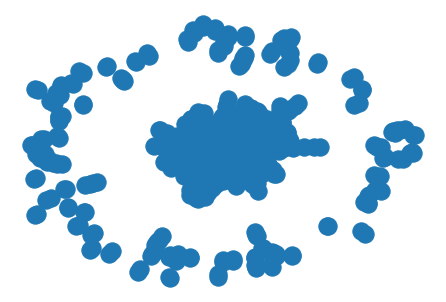

In [71]:
nx.draw(ppi_graph)

In [ ]:
nx.all_pairs_shortest_path_length